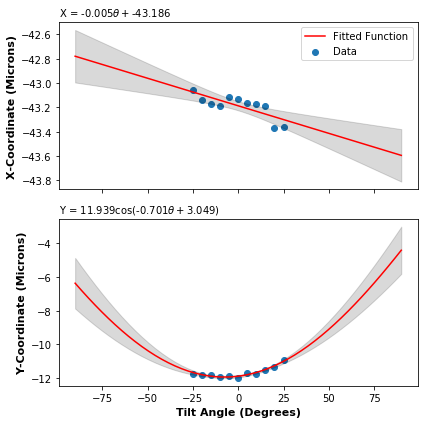

In [3]:
# %load offline_fit_curve.py
from matplotlib import pyplot as plt
import uncertainties.unumpy as unp
import uncertainties as unc
from scipy import optimize
import numpy as np


#Theta(Degrees), Y-Coordinate(Micron)
coord = np.loadtxt('Coordinate.txt', delimiter=',', usecols=range(4))
alpha_coord = coord[:,0] 
x_coord = coord[:,1]
y_coord = coord[:,2]

#Functional Form
def fit_cos(x,a,b,c):
	return a*np.cos(b*x*np.pi/180+c)

def fit_lin(x,a,b):
    return a*x+b

# Curve Fitting
lin_params, lin_covar = optimize.curve_fit(fit_lin, alpha_coord, x_coord)
cos_params, cos_covar = optimize.curve_fit(fit_cos, alpha_coord, y_coord)

lin_form = 'X = ' + str(round(lin_params[0],3)) + r'$\theta + $' \
            + str(round(lin_params[1],3))
cos_form = 'Y = ' + str(round(cos_params[0],3)) + r'$\cos($' + \
            str(round(cos_params[1],3)) + r'$\theta + $' + \
            str(round(cos_params[2],3)) + ')'

#Confidence Modeling (lin)
a,b = unc.correlated_values(lin_params, lin_covar)
px = np.linspace(-90, 90)
py = fit_lin(px,a,b)
nom_lin = unp.nominal_values(py)
std_lin = unp.std_devs(py)

#Confidence Modeling (cos)
a,b,c = unc.correlated_values(cos_params, cos_covar)
px = np.linspace(-90,90)
py = a*unp.cos(b*px*np.pi/180+c)
nom_cos = unp.nominal_values(py)
std_cos = unp.std_devs(py)  

# #Plot Fitted Model
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,6))
fig.subplots_adjust(hspace=0.1,left=0.15)

x = np.linspace(-90, 90)
ax1.scatter(alpha_coord, x_coord, label='Data')
ax1.plot(x,fit_lin(x, lin_params[0], lin_params[1]), color='r', label='Fitted Function')
ax1.set_ylabel('X-Coordinate (Microns)',fontweight='bold', fontsize=11)
ax1.set_xticklabels([])
ax1.set_title(lin_form,loc='left',fontsize=10)
ax1.legend()
ax1.fill_between(x, nom_lin - 1.96 * std_lin, nom_lin +1.96*std_lin, color ="black", alpha=.15)

#Plot Data Points. 
ax2.scatter(alpha_coord, y_coord, label='Data')
ax2.plot(x, fit_cos(x, cos_params[0], cos_params[1], cos_params[2]), color='r', label='Fitted Function')
ax2.set_xlabel('Tilt Angle (Degrees)',fontweight='bold', fontsize=11)
ax2.set_ylabel('Y-Coordinate (Microns)',fontweight='bold', fontsize=11)
ax2.set_title(cos_form,loc='left',fontsize=10)
ax2.fill_between(x, nom_cos - 1.96 * std_cos, nom_cos + 1.96*std_cos, color ="black", alpha=.15)
plt.tight_layout()
plt.show() 
